IMPORTING THE LIBRABRIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

LOADING THE DATASET

In [3]:
# Load dataset
dataset = pd.read_csv("Risk_Level.csv")

FEATURE SELECTION

In [4]:
# Select features (X) and target (y)
x = dataset.iloc[:, [1, 5, 6, 7, 8, 11, 12, 13]].values
y = dataset.iloc[:, -1].values

ENCODING THE TARGET LABELS

In [5]:
# Encode target labels
le = LabelEncoder()
y = le.fit_transform(y)

DEFINING THE CATEGORICAL AND NUMERICAL FEATURES

In [6]:
# Define categorical and numerical feature indices
categorical_features = [2, 6]  # Indices of categorical columns (Weather Type, Bridge Type)
numerical_features = [0, 1, 3, 4, 5, 7]  # Indices of numerical columns

ENCODING AND SCALING

In [7]:
# Apply encoding and scaling transformations
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_features),  # One-hot encode categorical
        ('scaler', StandardScaler(), numerical_features)  # Scale numerical
    ]
)

APPLYING THE TRANSFORMATION


In [8]:
# Apply transformations **before** train-test split
x = ct.fit_transform(x)  # Apply transformation to entire dataset

SPLITTING THE DATA INTI TRAIN AND TEST SET

In [9]:
# Split dataset into train-test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

CONVERTING TO DENSE ARRAYS

In [10]:
x_train = x_train.toarray() if hasattr(x_train, "toarray") else x_train
x_test = x_test.toarray() if hasattr(x_test, "toarray") else x_test

XGBOOST TRAINING

In [13]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

print("Model trained successfully!")

Model trained successfully!


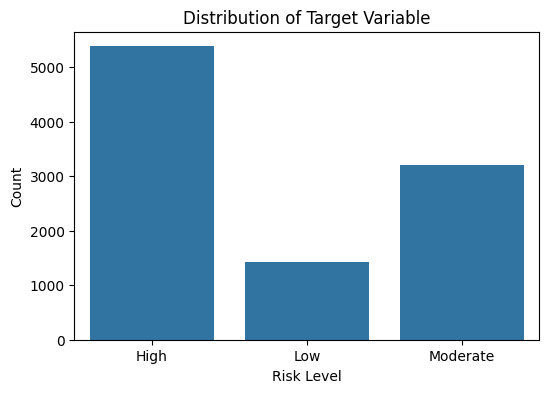

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.xlabel('Risk Level')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(len(le.classes_)), labels=le.classes_)
plt.show()

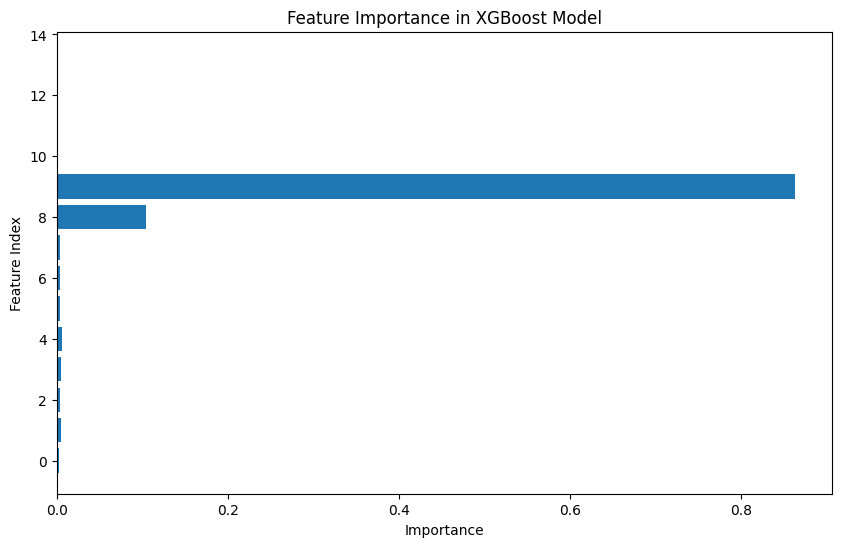

In [15]:
plt.figure(figsize=(10, 6))
xgboost_importance = classifier.feature_importances_
plt.barh(range(len(xgboost_importance)), xgboost_importance)
plt.title('Feature Importance in XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.show()

TESTING THE MODEL ON TEST SET

In [18]:
y_pred = classifier.predict(x_test)
y_pred_text = le.inverse_transform(y_pred)
print(y_pred_text)

['High' 'Moderate' 'High' ... 'High' 'Moderate' 'Moderate']


CONFUSION MATRIX

[[1048    0    7]
 [   0  304    2]
 [   1    5  633]]


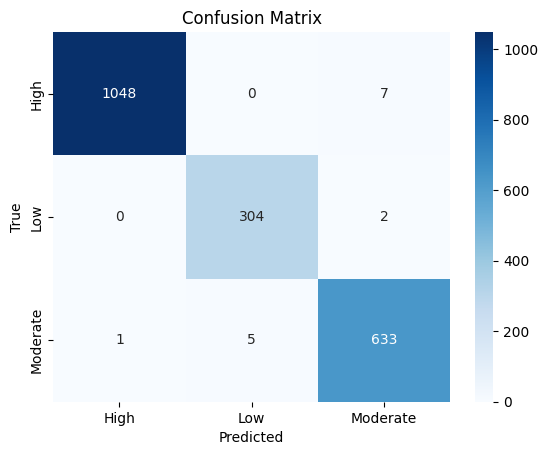

In [17]:
from sklearn.metrics import confusion_matrix , accuracy_score, classification_report
cm = confusion_matrix(y_test , y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

SAVING THE MODEL

In [20]:
import joblib

# Save the model
joblib.dump(classifier, 'xgboost_model.joblib')

# Save the ColumnTransformer
joblib.dump(ct, 'column_transformer.joblib')

# Save the LabelEncoder
joblib.dump(le, 'label_encoder.joblib')

print("Model and preprocessing steps saved successfully!")

Model and preprocessing steps saved successfully!


In [21]:
import joblib
import pandas as pd

# Load the model
classifier = joblib.load('xgboost_model.joblib')

# Load the ColumnTransformer
ct = joblib.load('column_transformer.joblib')

# Load the LabelEncoder
le = joblib.load('label_encoder.joblib')

print("Model and preprocessing steps loaded successfully!")

# Define the feature names (replace with your actual feature names)
feature_names = [
    'Age',  # Numerical
    'Traffic Volume',  # Numerical
    'Weather',  # Categorical (Weather Type)
    'Water Flow rate',  # Numerical
    'Stress',  # Numerical
    'Rainfall',  # Numerical
    'Bridge Design',  # Categorical (Bridge Type)
    'Humidity'   # Numerical
]

# Take user input for each feature
user_input = []
for feature in feature_names:
    value = input(f"Enter value for {feature}: ")
    user_input.append(value)

# Convert the input into a DataFrame
new_data = pd.DataFrame([user_input], columns=feature_names)

# Convert numerical features to the correct data type
numerical_features = [0, 1, 3, 4, 5, 7]  # Indices of numerical columns
for i in numerical_features:
    new_data[feature_names[i]] = pd.to_numeric(new_data[feature_names[i]])

print("User input received and processed:")
print(new_data)

# Preprocess the new data using the loaded ColumnTransformer
new_data_transformed = ct.transform(new_data)

# Convert to dense array if necessary
new_data_transformed = new_data_transformed.toarray() if hasattr(new_data_transformed, "toarray") else new_data_transformed

print("Preprocessed data:")
print(new_data_transformed)

# Make predictions
predictions = classifier.predict(new_data_transformed)

# Inverse transform the predictions to original labels (if needed)
predicted_labels = le.inverse_transform(predictions)

print("Prediction:", predicted_labels[0])

Model and preprocessing steps loaded successfully!
User input received and processed:
   Age  Traffic Volume Weather  Water Flow rate  Stress  Rainfall  \
0   16             105   Rainy              2.5    0.05      0.25   

  Bridge Design  Humidity  
0         Truss      0.05  
Preprocessed data:
[[ 0.          1.          0.          0.          0.          0.
   0.          1.         -0.58597222 -1.73012824 -1.73014573 -1.73014573
  -1.73014573 -1.73014573]]
Prediction: Low


c:\Users\hp\OneDrive\Desktop\Project\hackathon\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
c:\Users\hp\OneDrive\Desktop\Project\hackathon\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
